# 로지스틱 회귀

## 시그모이드 함수
--------
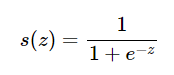


## 오차 공식-평균제곱근 오차를 사용하지 않는 이유
------------
- 로지스틱 회귀에서 평균 제곱 오차를 비용 함수로 사용하면 경사 하강법을 사용했을 때 찾고자 하는 최소값이 아닌 잘못된 최소에 빠짐.(글로벌 미니멈이 아닌 로컬 미니멈에 도달함)
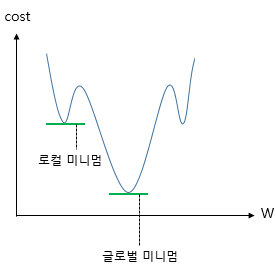

In [1]:
import tensorflow as tf

In [2]:
import numpy as np

In [25]:
#x,y의 데이터 값
data=[[2,0],[4,0],[6,0],[8,1],[10,1],[12,1],[14,1]]
x_data=[x_row[0] for x_row in data]
y_data=[y_row[1] for y_row in data]

#a, b의 값을 임의로 정함
a=tf.Variable(tf.random_normal([1],dtype=tf.float64,seed=0))
b=tf.Variable(tf.random_normal([1],dtype=tf.float64,seed=0))

#y시그모이드 함수 방정식
y=1/(1+np.e**(a*x_data+b))

In [27]:
#loss 구하는 함수
loss=-tf.reduce_mean(np.array(y_data)*tf.log(y)+(1-np.array(y_data))*tf.log(1-y))

#학습률
learning_rate=0.5

#로스 최소로 하는 값 찾기
gradient_decent=tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

#학습
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(60001):
        sess.run(gradient_decent)
        if i%6000==0:
            print('Epoch:%.f, loss=%.4f, 기울기 a=%.4f, y절편=%.4f'%
                 (i,sess.run(loss),sess.run(a),sess.run(b)))
            
    #결과 검증하기
    new_x_data=5
    y_test=1/(1+np.e**(a*new_x_data+b))
    print(sess.run(y_test))
    
    new_x_data=7
    y_test=1/(1+np.e**(a*new_x_data+b))
    print(sess.run(y_test))
    
    new_x_data=13
    y_test=1/(1+np.e**(a*new_x_data+b))
    print(sess.run(y_test))
    

Epoch:0, loss=1.2676, 기울기 a=0.1849, y절편=-0.4334
Epoch:6000, loss=0.0152, 기울기 a=-2.9211, y절편=20.2983
Epoch:12000, loss=0.0081, 기울기 a=-3.5638, y절편=24.8011
Epoch:18000, loss=0.0055, 기울기 a=-3.9557, y절편=27.5464
Epoch:24000, loss=0.0041, 기울기 a=-4.2380, y절편=29.5232
Epoch:30000, loss=0.0033, 기울기 a=-4.4586, y절편=31.0676
Epoch:36000, loss=0.0028, 기울기 a=-4.6396, y절편=32.3346
Epoch:42000, loss=0.0024, 기울기 a=-4.7930, y절편=33.4087
Epoch:48000, loss=0.0021, 기울기 a=-4.9261, y절편=34.3406
Epoch:54000, loss=0.0019, 기울기 a=-5.0436, y절편=35.1636
Epoch:60000, loss=0.0017, 기울기 a=-5.1489, y절편=35.9005
[3.88397689e-05]
[0.53537991]
[1.]


In [23]:
data=[[1,0.2],[2,0.3],[3,0.5],[4,0.6],[5,0.9],[6,0.95],[7,1.1],[9,1.5]]
x_data=[x_row[0] for x_row in data]
y_data=[y_row[1] for y_row in data]


#a, b의 값을 임의로 정함
a=tf.Variable(tf.random_normal([1],dtype=tf.float64,seed=0))
b=tf.Variable(tf.random_normal([1],dtype=tf.float64,seed=0))

#y시그모이드 함수 방정식
y=1/(1+np.e**(a*x_data+b))

#loss 구하는 함수
loss=-tf.reduce_mean(np.array(y_data)*tf.log(y)+(1-np.array(y_data))*tf.log(1-y))

#학습률
learning_rate=0.01

#로스 최소로 하는 값 찾기
gradient_decent=tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

#학습
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(30001):
        sess.run(gradient_decent)
        if i%6000==0:
            print('Epoch:%.f, loss=%.4f, 기울기 a=%.4f, y절편=%.4f'%
                 (i,sess.run(loss),sess.run(a),sess.run(b)))

Epoch:0, loss=0.2939, 기울기 a=-0.6346, y절편=-0.6326
Epoch:6000, loss=-0.7997, 기울기 a=-4.0073, y절편=6.6257
Epoch:12000, loss=-1.2542, 기울기 a=-5.3244, y절편=11.4792
Epoch:18000, loss=-1.3280, 기울기 a=-5.5875, y절편=13.6384
Epoch:24000, loss=nan, 기울기 a=nan, y절편=nan
Epoch:30000, loss=nan, 기울기 a=nan, y절편=nan


In [29]:
x=tf.constant([[1.0,2.0,3.0]])
w=tf.constant([[2.0],[2.0],[2.0]])
y=tf.matmul(x,w)
print(x.get_shape())

#텐서플로 안에서 행렬 선언, 연산 기능
sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)
result=sess.run(y)

print (result)

(1, 3)
[[12.]]


In [30]:
x=tf.Variable([[1.,2.,3.]],dtype=tf.float32)
w=tf.constant([[2.],[2.],[2.]],dtype=tf.float32)
y=tf.matmul(x,w)

#variable로 선언한것
sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)
result=sess.run(y)

print (result)

[[12.]]


In [33]:
input_data=[[1.,2.,3.],[1.,2.,3.],[2.,3.,4.]]#3*3matrix
x=tf.placeholder(dtype=tf.float32,shape=[None,3])
w=tf.Variable([[2.],[2.],[2.]],dtype=tf.float32)#3*1matrix
y=tf.matmul(x,w)

sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)
result=sess.run(y,feed_dict={x:input_data})

print(result)

#placeholder도 행렬 저장 가능. 

[[12.]
 [12.]
 [18.]]


In [34]:
input_data=[[1,1,1],[2,2,2]]

x=tf.placeholder(dtype=tf.float32, shape=[2,3])
w=tf.Variable([[2],[2],[2]],dtype=tf.float32)
b=tf.Variable([4],dtype=tf.float32)
y=tf.matmul(x,w)+b
print(x.get_shape())

sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)
result=sess.run(y,feed_dict={x:input_data})

print(result)

#브로드캐스팅

(2, 3)
[[10.]
 [16.]]


## 여러 입력 값을 갖는 로지스틱 회귀

In [57]:
#실행할 때마다 같은 결과를 출력하기 위한 시드값 설정
seed=0
np.random.seed(seed)
tf.set_random_seed(seed)

#데이터값
x_data=np.array([[2,3],[4,3],[6,4],[8,6],[10,7],[12,8],[14,9]])
y_data=np.array([[0,0,0,1,1,1,1]]).reshape(7,1)

#입력 값을 플레이스 홀더에 저장
X=tf.placeholder(tf.float64,shape=[None,2])
Y=tf.placeholder(tf.float64,shape=[None,1])

#기울기 a와 바이어스 b의 값을 임의로 정함
a=tf.Variable(tf.random_uniform([2,1],dtype=tf.float64))
#[2,1] 의미: 들어오는 값은 두개, 나가는 값은 한개
b=tf.Variable(tf.random_uniform([1],dtype=tf.float64))

#y 시그모이드 함수의 방정식을 세움
y=tf.sigmoid(tf.matmul(X,a)+b)

#오차를 구하는 함수
loss=-tf.reduce_mean(Y*tf.log(y)+(1-Y)*tf.log(1-y))

#학습률 값
learning_rate=0.1

#오차를 최소로 하는 값 찾기
gradient_decent=tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

predicted=tf.cast(y>0.5,dtype=tf.float64)
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,Y),dtype=tf.float64))

#학습
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(3001):
        a_,b_,loss_, _=sess.run([a,b,loss,gradient_decent],
                                feed_dict={X:x_data, Y:y_data})
        if (i+1)%300==0:
            print('step=%d, a1=%.4f, a2=%.4f, b=%.4f, loss=%.4f'%
                 (i+1,a_[0],a_[1],b_,loss_))
            
    print('predicted=',sess.run(predicted, feed_dict={X:x_data}))
    
    

    #다른 값 테스트
    p_val, h_val=sess.run([predicted, y],feed_dict={X:[[1,5],[10,5],[4,5]]})
    print('check predicted=\n',p_val)
    print('check hypothesis=\n',h_val)

    #정확도 측정
    h,c,a=sess.run([y,predicted, accuracy],feed_dict={X:x_data,Y:y_data})

    print('\nHypothesis:\n',h,"\nCorrect (Y):\n",c,'\nAccuracy:\n',a)

step=300, a1=0.8052, a2=-0.5672, b=-2.2783, loss=0.2763
step=600, a1=0.8221, a2=-0.3114, b=-3.7953, loss=0.1960
step=900, a1=0.7370, a2=0.0134, b=-4.8819, loss=0.1525
step=1200, a1=0.6350, a2=0.3201, b=-5.7378, loss=0.1245
step=1500, a1=0.5367, a2=0.5943, b=-6.4456, loss=0.1049
step=1800, a1=0.4473, a2=0.8366, b=-7.0496, loss=0.0905
step=2100, a1=0.3676, a2=1.0506, b=-7.5767, loss=0.0795
step=2400, a1=0.2971, a2=1.2405, b=-8.0444, loss=0.0708
step=2700, a1=0.2346, a2=1.4101, b=-8.4647, loss=0.0638
step=3000, a1=0.1790, a2=1.5627, b=-8.8465, loss=0.0581
predicted= [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]]
check predicted=
 [[0.]
 [1.]
 [0.]]
check hypothesis=
 [[0.2988344 ]
 [0.68052054]
 [0.42152538]]

Hypothesis:
 [[0.02187046]
 [0.03097995]
 [0.17914219]
 [0.87672983]
 [0.97981839]
 [0.99699171]
 [0.99955817]] 
Correct (Y):
 [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]] 
Accuracy:
 1.0
